# Import?

In [1]:
# # !pip install googletrans==4.0.0-rc1             # package version update
# import googletrans
# from googletrans import Translator
# import pandas as pd
# import numpy as np

# import re
# import string
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize
# # nltk.download('wordnet')
# # nltk.download('omw-1.4')


# from PIL import Image
# import matplotlib.pyplot as plt
# from wordcloud import STOPWORDS, WordCloud
# import seaborn as sns


# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import make_pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# Basic Cleaning !

In [1]:
#data                               
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import PorterStemmer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# wordcloud
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

## translation
# import googletrans
# from googletrans import Translator

In [3]:
def preprocessing(sentence):
    sentence = str(sentence)
    sentence = sentence.strip()
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    sentence = sentence.replace('\r\n', ' ')
    
    manual_sw = ['amp']

    manual_sw = ['내', '나를', '나의', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더', "n't",  'l', 'u', '-',
                'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 
                 '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이','-','na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 
                '“', 'wan', '한', '해', '건', '한', '게', '좀', '두', '안']
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, ' ') 

    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = list(set(stopwords.words('english'))) ## define stopwords
    stop_words.extend(manual_sw)
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]
    
    return ' '.join(tokenized_sentence_cleaned)


In [45]:
girls_df['song_lyrics'] = girls_df['song_lyrics'].apply(preprocessing)

In [46]:
girls_df.head(15)

,artist_id,artist_name,album_id,album_title,song_id,song_title,release_date,song_artist,song_lyrics,year
0,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704240,FOREVER 1 (Matisse & Sadko Remix),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
1,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704241,FOREVER 1 (Aiobahn Remix),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
2,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704242,FOREVER 1 (Mar Vista Remix),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
3,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704243,FOREVER 1 (Matisse & Sadko Remix) (Extended Ver.),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
4,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704244,FOREVER 1 (Aiobahn Remix) (Extended Ver.),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
5,80026432,소녀시대 (GIRLS' GENERATION),20528353,iScreaM Vol.19 : FOREVER 1 Remixes,32704245,FOREVER 1 (Mar Vista Remix) (Extended Ver.),2022-11-17,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
6,80026432,소녀시대 (GIRLS' GENERATION),20484595,FOREVER 1 - The 7th Album,32612433,FOREVER 1,2022-08-05,소녀시대 (GIRLS' GENERATION),forever love love stopping 머문 세상이 아름다운 겁 없이 외치...,2022
7,80026432,소녀시대 (GIRLS' GENERATION),20484595,FOREVER 1 - The 7th Album,32612434,Lucky Like That,2022-08-05,소녀시대 (GIRLS' GENERATION),기다려온 소원들이 오늘로 이뤄졌듯이 알잖아 우린 lucky like lucky li...,2022
8,80026432,소녀시대 (GIRLS' GENERATION),20484595,FOREVER 1 - The 7th Album,32612435,Seventeen,2022-08-05,소녀시대 (GIRLS' GENERATION),맞아 느낌 마치 홀린 듯이 너에게 이끌려 깨어나 seventeen 뜨겁던 summe...,2022
9,80026432,소녀시대 (GIRLS' GENERATION),20484595,FOREVER 1 - The 7th Album,32612436,Villain,2022-08-05,소녀시대 (GIRLS' GENERATION),모두가 숨죽인 도시 밤은 소리 없는 패닉 지켜줄 hero 대신 열어둘게 여기 bac...,2022


In [47]:
# without filtering
total_lyrics = ' '.join(girls_df['song_lyrics'])
len(total_lyrics)

3358353

In [64]:
df = girls_df.copy()
df['album_title'] = df['album_title'].str.lower()
df['song_title'] = df['song_title'].str.lower()
df['song_lyrics'] = df['song_lyrics'].apply(preprocessing)

In [62]:
# # Feature selection - which columns?
# df.columns

In [69]:
df = df.sort_values('release_date')
df = df[df['artist_name'] != 'Various Artists']
df = df[df['song_lyrics'] != '']
df = df[df['song_lyrics'] != 'nan']
df = df.drop_duplicates(['artist_id','song_title'])
df = df.drop_duplicates(['song_lyrics'], keep='first')

df = df[~df['album_title'].str.contains('remix')]
df = df[~df['album_title'].str.contains('japan')]
df = df[~df['album_title'].str.contains('일본')]
df = df[~df['album_title'].str.contains('live')]
df = df[~df['album_title'].str.contains(' ost ')]
df = df[~df['album_title'].str.contains('inst')]
df = df[~df['album_title'].str.contains('repackage')]
df = df[~df['album_title'].str.contains('chinese')]
df = df[~df['album_title'].str.contains(' ver.')]

df = df[~df['song_title'].str.contains('권리없는')]
df = df[~df['song_title'].str.contains('remix')]
df = df[~df['song_title'].str.contains('japan')]
df = df[~df['song_title'].str.contains('chinese')]
df = df[~df['song_title'].str.contains(' inst ')]
df = df[~df['album_title'].str.contains(' ver.')]
# df.reset_index(inplace=True)
df.shape

(2341, 12)

In [70]:
df[df['artist_id']==80026432]

,level_0,index,artist_id,artist_name,album_id,album_title,song_id,song_title,release_date,song_artist,song_lyrics,year
150,150,435,80026432,소녀시대 (GIRLS' GENERATION),8029146,다시 만난 세계,80353915,perfect for you (소원),2007-08-03,소녀시대 (GIRLS' GENERATION),소원을 말해요 들어줄게 매일밤 혼자 기도만 하지말고 날사랑하는맘 알고있는걸 날사귀고...,2007
151,151,434,80026432,소녀시대 (GIRLS' GENERATION),8029146,다시 만난 세계,80353914,beginning,2007-08-03,소녀시대 (GIRLS' GENERATION),girl right 그댄 아나요 우리처음 만난날 우연처럼 우리는 마주쳤었죠 그렇지만...,2007
152,152,433,80026432,소녀시대 (GIRLS' GENERATION),8029146,다시 만난 세계,80353913,다시 만난 세계 (into the new world),2007-08-03,소녀시대 (GIRLS' GENERATION),전해주고싶어 슬픈 시간이 흩어진 후에야 들리지만 눈을 감고 느껴봐 움직이는 마음 향...,2007
170,166,429,80026432,소녀시대 (GIRLS' GENERATION),8031427,girls' generation (소녀시대),80381994,7989 (강타 & 태연),2007-11-01,소녀시대 (GIRLS' GENERATION),유난히 오늘따라 왜 그렇게 웃고 있는거니 얼마 전 소개 시켜준 사람이니 웃게 만드는...,2007
169,168,427,80026432,소녀시대 (GIRLS' GENERATION),8031427,girls' generation (소녀시대),80381992,그대를 부르면 (tears),2007-11-01,소녀시대 (GIRLS' GENERATION),하얀 별빛이 까만 어둠이 저 멀리서 밀어내고 있죠 환한 미소로 그대를 바라만 봐도 ...,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2199,13,80026432,소녀시대 (GIRLS' GENERATION),20484595,forever 1 - the 7th album,32612440,완벽한 장면 (summer night),2022-08-05,소녀시대 (GIRLS' GENERATION),손 잡을 때 미소 짓게 돼 완벽한 장면 저 해는 지고 귓가에 울린 차가운 탄산 소리...,2022
2194,2197,11,80026432,소녀시대 (GIRLS' GENERATION),20484595,forever 1 - the 7th album,32612438,closer,2022-08-05,소녀시대 (GIRLS' GENERATION),선택은 각자의 몫 그렇게 말을 해도 재고 계산해 사랑을 판단할 자격 누구에게도 없어...,2022
2195,2196,10,80026432,소녀시대 (GIRLS' GENERATION),20484595,forever 1 - the 7th album,32612437,you better run,2022-08-05,소녀시대 (GIRLS' GENERATION),분명히 말했었지 멋진 되는 그날 갚아주겠다고 지금인 ready killing kil...,2022
2191,2200,14,80026432,소녀시대 (GIRLS' GENERATION),20484595,forever 1 - the 7th album,32612441,freedom,2022-08-05,소녀시대 (GIRLS' GENERATION),가벼운 몸짓에 날개를 단 듯해 구름 위를 걷는 발끝 맞닿은 시선에 서로를 담은 채 ...,2022


In [71]:
print('number of rows - original: ', len(girls_df))
print('number of rows - after filtering: ', len(df))

number of rows - original:  6034
number of rows - after filtering:  2341


In [72]:
print('number of rows - original: ', len(' '.join(girls_df['song_lyrics'])))
print('number of rows - after filtering: ', len(' '.join(df['song_lyrics'])))

number of rows - original:  3358353
number of rows - after filtering:  1708339


In [14]:
# artist_df = pd.read_csv('../data/girlgroup_list.csv')

# artist_df = artist_df.dropna()
# artist_df['Artist ID'] = artist_df['Artist ID'].astype(int)
# artist_df.reset_index(inplace=True, drop=True)

# group_lst = artist_df[artist_df['Category']=='Idol']['Artist ID'].tolist()
# solo_lst = artist_df[artist_df['Category']=='Solo']['Artist ID'].tolist()

# By Groups - Keywords

In [73]:
artist_df = pd.read_csv('../data/girlgroup_list.csv')

artist_df = artist_df.dropna()
artist_df['Artist ID'] = artist_df['Artist ID'].astype(int)
artist_df.reset_index(inplace=True, drop=True)

In [74]:
df_artist_year = df.groupby(['artist_id', 'year']).sum()['song_lyrics'].reset_index()
df_artist_year = df_artist_year.merge(artist_df, how='left', left_on = 'artist_id', right_on='Artist ID')[['artist_id', 'year', 'English Name', 'song_lyrics']]
df_artist_year = df_artist_year.rename(columns={'English Name': 'artist_name'})

In [75]:
df_artist_year.to_csv('../data/artist_by_year.csv', index=0)

In [76]:
df_artist_album = df.groupby(['artist_id', 'album_title', 'year']).sum()['song_lyrics'].reset_index()
df_artist_album = df_artist_album.merge(artist_df, how='left', left_on = 'artist_id', right_on='Artist ID')[['artist_id', 'year', 'album_title','English Name', 'song_lyrics']]
df_artist_album = df_artist_album.rename(columns={'English Name': 'artist_name'})

In [77]:
df_artist_year.to_csv('../data/artist_by_year_and_album.csv', index=0)

In [78]:
def wc_by_year(df=df_artist_year, artist_id_=0):
    df = df[df['artist_id']==artist_id_]
    lyric_lst = [i for i in df.song_lyrics]
    year_lst = [i for i in df.year]

    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='../data/font/JalnanOTF.otf', width = 1000, height = 500, 
        colormap='BuPu', max_words=50, collocations = False).generate(lyric)

        plt.figure(figsize = (5,5))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'{df.artist_name.iloc[0]} - {year_lst[lyric_lst.index(lyric)]}')
        plt.show()
        
#         yearr=year_lst[lyric_lst.index(lyric)]
#         word_cloud.to_file(f"data/final_wordcloud_png/{yearr}_wordcloud.png")

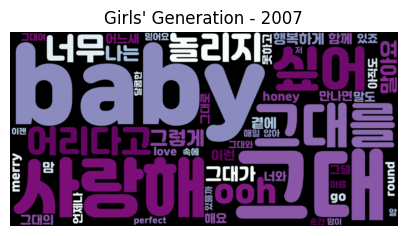

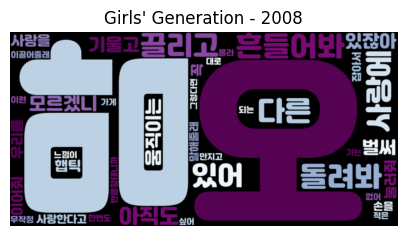

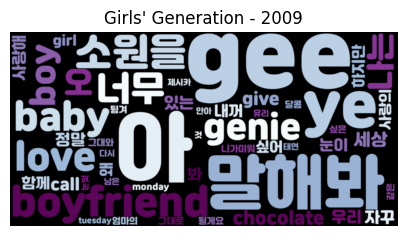

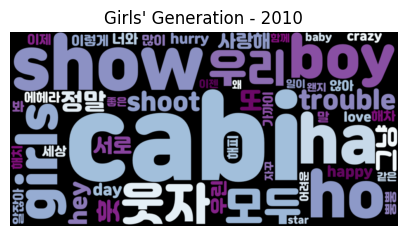

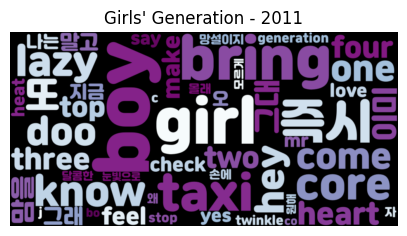

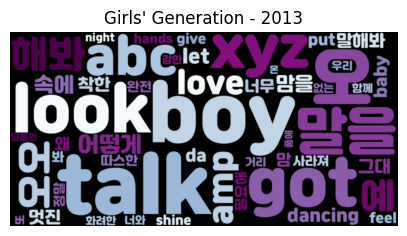

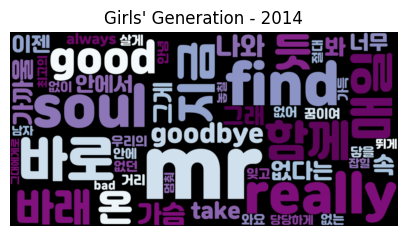

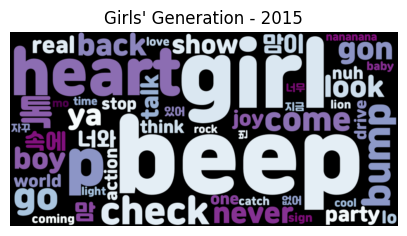

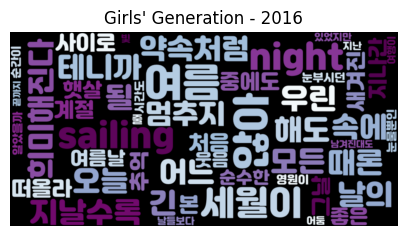

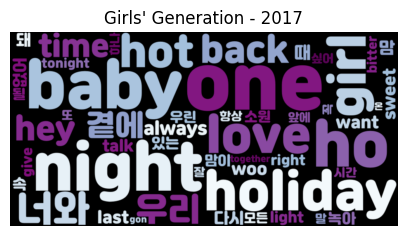

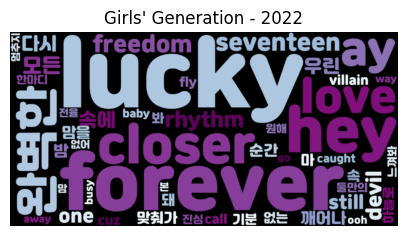

In [79]:
wc_by_year(df_artist_year, 80026432)

In [22]:
def wc_by_album(df, artist_id_):
    
    
    df = df[df['artist_id']==artist_id_]
    df = df.sort_values('year')
    lyric_lst = [i for i in df.song_lyrics]
    year_lst = [i for i in df.year]
    album_lst = [i for i in df.album_title]
    
    artist_name_ = df.artist_name.iloc[0]
    
    
    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='../data/font/JalnanOTF.otf', width = 1000, height = 500, 
        colormap='prism', background_color= 'white', max_words=30, collocations = False).generate(lyric)

        plt.figure(figsize = (6,4))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'{artist_name_} - {df.album_title.iloc[lyric_lst.index(lyric)]} - {year_lst[lyric_lst.index(lyric)]}')
        plt.show()
        
#         yearr=year_lst[lyric_lst.index(lyric)]
#         word_cloud.to_file(f"data/final_wordcloud_png/{yearr}_wordcloud.png")

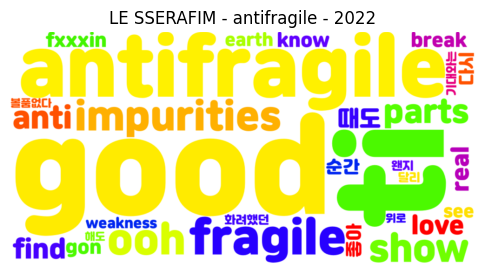

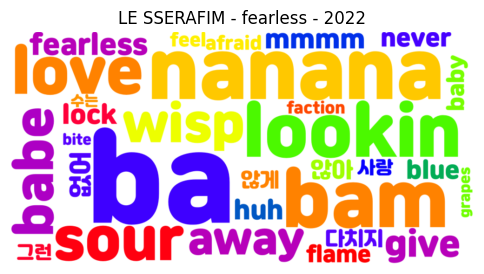

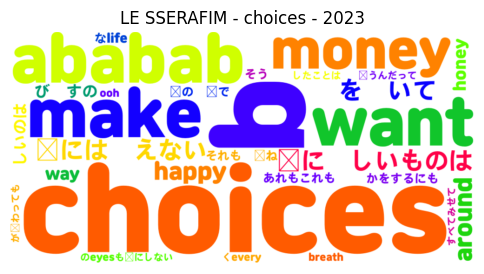

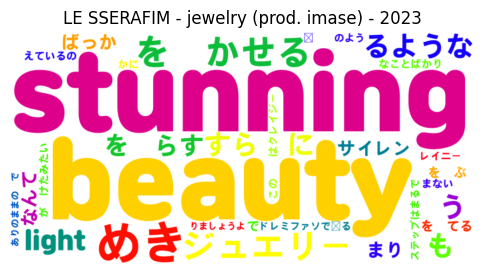

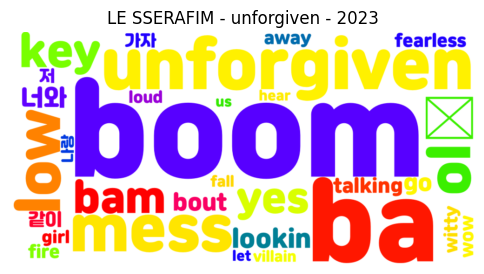

/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/pytho

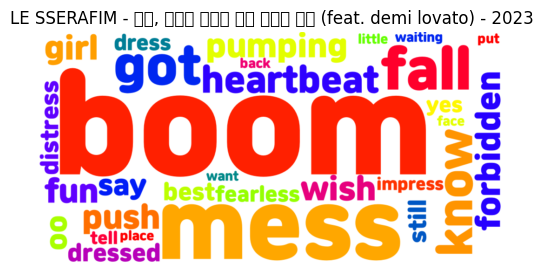

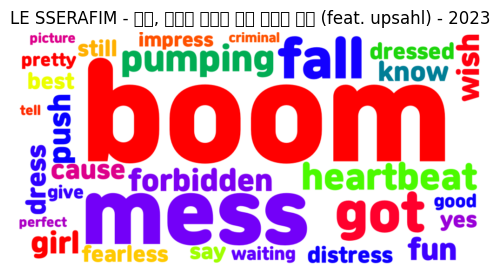

In [23]:
wc_by_album(df_artist_album, 20158908)

# Translation

In [24]:
# !pip install spacy_langdetect

In [25]:
# pip install --upgrade google-cloud-translate

In [26]:
from google.cloud import translate

def translate_text(target: str, text: str) -> dict:
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))

    return result


In [27]:
sample_text = '우리 추억들의 메들리는 멈추지 않아 영원히 really really 친구를 넘어'

In [28]:
translate_text('ko', sample_text)

Forbidden: 403 POST https://translation.googleapis.com/language/translate/v2?prettyPrint=false: Cloud Translation API has not been used in project 221871789903 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/translate.googleapis.com/overview?project=221871789903 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

In [ ]:
def print_supported_languages(display_language_code: str):
    client = translate.TranslationServiceClient()

    response = client.get_supported_languages(
        parent=PARENT,
        display_language_code=display_language_code,
    )

    languages = response.languages
    print(f" Languages: {len(languages)} ".center(60, "-"))
    for language in languages:
        language_code = language.language_code
        display_name = language.display_name
        print(f"{language_code:10}{display_name}")
    

In [ ]:
text = "Hello World!"
target_languages = ["tr", "de", "es", "it", "el", "zh", "ja", "ko"]

print(f" {text} ".center(50, "-"))
for target_language in target_languages:
    translation = translate_text(text, target_language)
    source_language = translation.detected_language_code
    translated_text = translation.translated_text
    print(f"{source_language} → {target_language} : {translated_text}")
    

In [ ]:
def papago(text, src="ko", dest="en"):  
    data = {'text' : text,
            'source' : src,
            'target': dest}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-NCP-APIGW-API-KEY-ID":,
              "X-NCP-APIGW-API-KEY":}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)


In [ ]:
import os
import sys
import urllib.request



def papago(text_example):
    client_id = 'uXBinGrMv2aeRek4l_FW' # 개발자센터에서 발급받은 Client ID 값
    client_secret = '_o13F8p9OZ' # 개발자센터에서 발급받은 Client Secret 값
    encText = urllib.parse.quote(text_example)
    data = "source=ko&target=en&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()
    
    if(rescode==200):
        response_body = response.read()
        return response
    else:
        return "Error Code:" + rescode

In [ ]:
hello = papago('그저 몸 뉠 있다고 해서 집이라고 부를 순 없더라 외롭고 지친 맘 기대 쉴 있는 곳')

In [ ]:
type(hello)

In [ ]:
hello

In [ ]:
hello2 = papago('안녕하세요')

In [ ]:
hello2.readinto(b)
# ['translatedText']

In [ ]:
# df = df.reset_index()
df = df.drop(columns=['level_0', 'index'])


In [ ]:
df['translated_lyrics'] = ''
df

In [ ]:
df_trial = df.iloc[0:5]
df_trial

In [ ]:
df_trial['translated_lyrics'] = df_trial['song_lyrics'].apply(lambda x: papago(x))
df_trial

In [ ]:
# import requests

# def deeptranslate(text, sl="ko", tl="en"):
#     url = "https://deep-translate1.p.rapidapi.com/language/translate/v2"
    
#     payload = {
#         "q": text,
#         "source": sl,
#         "target": tl
#     }
#     headers = {
#         "content-type": "application/json",
#         "X-RapidAPI-Key": "b4e9cce2d8msh67117c185af8d26p1a2089jsnfb81161bfddc",
#         "X-RapidAPI-Host": "deep-translate1.p.rapidapi.com"
#     }
    
#     response = requests.request("POST", url, json=payload, headers=headers)
#     translated = response.json()["data"]["translations"]["translatedText"]
#     return translated

In [ ]:
# ! pip3 install google-cloud-translate

In [ ]:
def clean_text(text):

    manual_sw = ['im', 'youre', "n't", '내', '나를', '나의', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더',
'널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 'amp', 'comp',
'tu', 'ye', 'it', 'i', 'but', '너무', 'so', 'in', '또', 'roob', '왔니', '조금', '꼭', '이렇게',
'bo', 'peep', 'the','lolli', '정말', 'for', 'lollipop', '이제', 'on', 'muzik', 'lets', 'about', 
'처', 'amoled', '좀', '두', '닷닷닷닷닷', '어쩌다', '4', 'is', 'and', 'to', 'you', 'me','huh', 'now', 'ooop',
'just', 're', 'jumpin', 'dori', 'let', 'one', '아', 'ma', 'take', 'its', 'woo', 'this', 'that',
'whoo', 'get', 'are', 'dovey', 'hey', '어머어머', 'hush', '오', '나는', '너는', '슈가프리', '자꾸', '위', '아래', '것', '있어', '같아', '돼', 'ya', 'tickle', 'ha',
'way', '싶어', '같은', '오늘', '딱', '않아', '마', 'poppy','같아', 'day', 'be', 'rollin', '게', 'ba', 'hoo', 'ey', 'pa', 'ooh', 'swan', 'woo', 'ill', 'da', 'zu',
'zim', 'dam', 'dda', 'got', 'umpah','안', '건', '할','것도', 'at', 'yah', 'all', 'with', 'ae']


    #changing to lowercase
    text = text.lower()
    text = text.replace('\r','')

    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)

    #indentation -> space
    text = re.sub(r'\n', ' ', text)

    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 

    #strip
    text = text.strip()

    #tokenization
    tokens = word_tokenize(text)   
    filtered_words = [w for w in tokens if w not in manual_sw]
    final = " ".join(cat for cat in filtered_words)

    return final

def kor_to_eng(text):

    #love related
    text = text.replace("사랑", "love")
    text = text.replace("좋아", "like") # like has multiple meanings, so needs to n-gram as well
    text = text.replace("키스", "kiss")
    text = text.replace("입맞", "kiss")
    text = text.replace("뽀뽀", "kiss")
    text = text.replace("터치", 'touch')
    text = text.replace("안아", 'hug')
    text = text.replace("원해", "want")
    text = text.replace("원하", "want")
    text = text.replace("밤", "night")

    #pronouns
#         text = text.replace("내", "my")
    text = text.replace("나의", "my")
    text = text.replace('우리', 'we')

    #gender-specific
    text = text.replace("남자", "man")
    text = text.replace("소년", 'boy')
    text = text.replace("오빠", "oppa")
    text = text.replace("그의", 'him')
    text = text.replace("그에게", 'him')
    text = text.replace("그와", 'him')
    text = text.replace("그를", 'him')
    text = text.replace("그가", 'him')
    text = text.replace("그는", 'him')
    text = text.replace("놈", 'guy')

    text = text.replace("소녀", "nyeo") #young girl (少女)
    text = text.replace("여자", "woman")
    text = text.replace("그녀", 'her')

# want & girl should be dealt with n-grams because the meaning is completely different 
#between English and Korean
#돈 (money)

    return text


In [ ]:
def translate_df(df, col, lang='en'):
    
    translator = Translator()
    df['eng'] = [translator.translate(i, src='ko', dest=lang).text for i in df[col]]   # 한영 변환을 새로운 칼럼 'eng'에 담습니다

    tmp1 = df.drop(['eng'], axis=1)                                                    # 2개의 temporary 데이터프레임을 생성해 원본과 한영번역 데이터프레임을 합칩니다
    tmp2 = df.drop([col], axis=1)
    tmp2.rename(columns={'eng':'data'}, inplace=True)
    result = pd.concat([tmp1,tmp2], ignore_index=True)
    result = result.drop_duplicates()
    
    return result                              

In [ ]:
gg_df = pd.read_csv('gg_final_dataframe.csv')
gg_df = gg_df[['artist_x', 'song_name', 'year', 'Lyric']]

In [ ]:
gg_df['cleaned_lyrics'] = gg_df.Lyric.apply(clean_text)
gg_df['final_lyrics'] = gg_df.cleaned_lyrics.apply(clean_text)
gg_df.drop(columns = ['Lyric', 'cleaned_lyrics'], inplace = True)
by_year_g = gg_df.groupby(['year']).sum()[['final_lyrics']]

In [ ]:
a=by_year_g[-2:-1]
a

In [ ]:
translate_df(a)